## Image Classification 
#### Spring 2020 - Image Classification

Recognition of traffic signs is a challenging real-world problem of high industrial relevance. Although commercial systems have reached the market and several studies on this topic have been published, systematic unbiased comparisons of different approaches are missing and comprehensive benchmark datasets are not freely available.

Traffic sign recognition is a multi-class classification problem with unbalanced class frequencies. Traffic signs can provide a wide range of variations between classes in terms of color, shape, and the presence of pictograms or text. However, there exist subsets of classes (e. g., speed limit signs) that are very similar to each other.

The classifier has to cope with large variations in visual appearances due to illumination changes, partial occlusions, rotations, weather conditions, etc.

Humans are capable of recognizing the large variety of existing road signs with close to 100% correctness. This does not only apply to real-world driving, which provides both context and multiple views of a single traffic sign, but also to the recognition from single images.

It's a great dataset for multi-class image classification problem.

### File descriptions

    train_and_test.npz - the complete dataset

    Update: If you have downloaded the data before 4/14/2020, please re-download the data. The labels in the new dataset are now one-hot encoded
        Load the data into a variable say 'data' using np.load()
        data['X_train'] represents X_train with each image's dimension being (32, 32, 3)
        data['y_train'] represents each image's label.
        data['X_test'] represents X_test with each image's dimension being (32, 32, 3)
    sample_oh.csv - a sample submission file in the correct format; this file only reflects the format of submissions. Your submissions will likely include probabilities instead of binary values in each row.
    
    *** Please refer to https://stackoverflow.com/questions/35133317/numpy-save-some-arrays-at-once to load using np.load() **

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load("Dataset/train_and_test.npz")

In [7]:
# load data
x_train = data['X_train']
x_test = data['X_test']

y_train = data['y_train']
#y_test = data['y_test']

print("Shape X_train is ", x_train.shape)
print("Shape X_test  is ", x_test.shape)
print("Shape y_train is ", y_train.shape)

Shape X_train is  (39209, 32, 32, 3)
Shape X_test  is  (12630, 32, 32, 3)
Shape y_train is  (39209, 43)


**Visualisation of dataset**

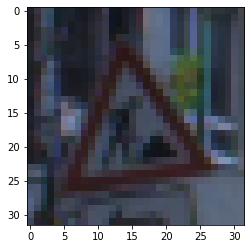

In [24]:
idx = 29864
item = x_train[idx]
plt.imshow(item)

In [25]:
y_train[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5, 0, 'idx of classes')

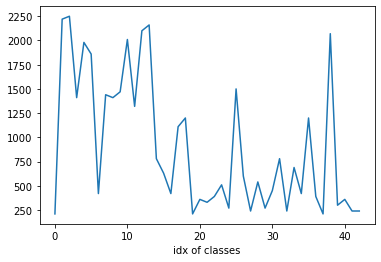

In [30]:
count = np.sum(y_train, axis =0)
plt.plot(count)
plt.xlabel("idx of classes")

In [59]:
x_train = np.reshape(x_train, (len(x_train), -1))

In [60]:
x_train.shape

(39209, 3072)

In [61]:
x_test = np.reshape(x_test, (len(x_test), -1))
x_test.shape

(12630, 3072)

**Extraction des features**

In [66]:
from sklearn.decomposition import PCA
pca = PCA(n_components=x_train.shape[1])
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=3072, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

With 150 features, We can present 0.96 of inertia 


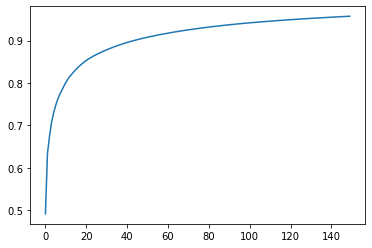

In [77]:
n_feat = 150
plt.plot(np.cumsum(pca.explained_variance_ratio_)[:n_feat])
print("With %d features, We can present %.2f of inertia " %(n_feat, 
                                                            np.cumsum(pca.explained_variance_ratio_)[n_feat]))

In [82]:
Xnew_train = pca.transform(x_train)[:,:n_feat]
Xnew_test = pca.transform(x_test)[:,:n_feat]

print("New dim of x_train ", Xnew_train.shape)
print("New dim of x_test ", Xnew_test.shape)

New dim of x_train  (39209, 150)
New dim of x_test  (12630, 150)


**Training the Model**

In [90]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Input
from keras.optimizers import Adam

In [96]:
# Multiple Layers Perceptron

# Classifier parameters
epsilon = 1e-6
momentum = 0.9

lenght_layers = 2
neuron_layers = 100

out_shape =y_train.shape[1]
kernel_ini='uniform'
lr = 0.001

model = Sequential()
model.add(Input(shape= Xnew_train.shape[1]))
for _ in range(lenght_layers):
    model.add(Dense(neuron_layers,kernel_initializer=kernel_ini,
                    activation='relu'))
    model.add(BatchNormalization(epsilon=epsilon, momentum=momentum))

model.add(Dense(out_shape,kernel_initializer=kernel_ini,
                activation='softmax'))
optimisateur = Adam(learning_rate=lr)
model.compile(optimizer=optimisateur, loss='binary_crossentropy', 
                     metrics=['binary_accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 100)               15100     
_________________________________________________________________
batch_normalization_133 (Bat (None, 100)               400       
_________________________________________________________________
dense_140 (Dense)            (None, 100)               10100     
_________________________________________________________________
batch_normalization_134 (Bat (None, 100)               400       
_________________________________________________________________
dense_141 (Dense)            (None, 43)                4343      
Total params: 30,343
Trainable params: 29,943
Non-trainable params: 400
_________________________________________________________________


In [97]:
# fitting the model 
history = model.fit(Xnew_train, y_train,
                       validation_split=0.1,
                       epochs=30, shuffle=True,
                       #validation_data=(X_test, y_test),
                       batch_size=128, verbose= 1)

Epoch 1/30
276/276 [==============================] - 3s 8ms/step - loss: 0.4673 - binary_accuracy: 0.9784 - val_loss: 0.1378 - val_binary_accuracy: 0.9752
Epoch 2/30
276/276 [==============================] - 1s 2ms/step - loss: 0.0370 - binary_accuracy: 0.9908 - val_loss: 0.1775 - val_binary_accuracy: 0.9677
Epoch 3/30
276/276 [==============================] - 1s 2ms/step - loss: 0.0184 - binary_accuracy: 0.9961 - val_loss: 0.2181 - val_binary_accuracy: 0.9647
Epoch 4/30
276/276 [==============================] - 1s 2ms/step - loss: 0.0120 - binary_accuracy: 0.9977 - val_loss: 0.2402 - val_binary_accuracy: 0.9627
Epoch 5/30
276/276 [==============================] - 1s 2ms/step - loss: 0.0086 - binary_accuracy: 0.9984 - val_loss: 0.2628 - val_binary_accuracy: 0.9604
Epoch 6/30
276/276 [==============================] - 1s 5ms/step - loss: 0.0067 - binary_accuracy: 0.9988 - val_loss: 0.2937 - val_binary_accuracy: 0.9593
Epoch 7/30
276/276 [==============================] - 1s 4ms/ste

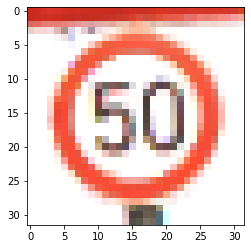

In [105]:
#Validate the model

idx =  124 #randint(0, y.shape[0])
img = Xnew_test[idx,:].reshape(-1)[None,:]


proba = model.predict(img)                #Get probabilities for each class
yhat = np.zeros(y_train.shape[1])
yhat[np.argmax(proba)] = 1                   #predict label

plt.imshow(x_test[idx].reshape(32,32,3))

In [111]:
y_train[3001]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

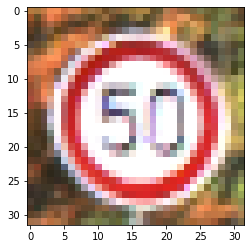

In [113]:
plt.imshow(x_train[3023].reshape(32,32,3))